In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_image_files_path = "/content/drive/MyDrive/10_LOAI_TRAI_CAY/TRAIN"
valid_image_files_path = "/content/drive/MyDrive/10_LOAI_TRAI_CAY/VAL"
label=['Physalis','Plum ','Potato Sweet','Quince','Rasberry','Salak','Strawberry Wedge','Tangelo','Tomato yellow','Watermelon']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)


In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(250, 250),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(250, 250),               
    class_mode='categorical')


Found 5474 images belonging to 10 classes.
Found 1838 images belonging to 10 classes.


In [ ]:
model=tf.keras.models.Sequential()

model.add(Conv2D(32,(3,3), activation='relu',input_shape=(250,250,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  
model.add(Flatten()) 

model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax)) 

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])
history=model.fit(
    train_generator,
    steps_per_epoch=3,
    epochs=150,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=3)

Epoch 1/150
3/3 [==============================] - 62s 23s/step - loss: 12.3386 - acc: 0.1562 - val_loss: 5.2248 - val_acc: 0.2292
Epoch 2/150
3/3 [==============================] - 60s 24s/step - loss: 3.7003 - acc: 0.2083 - val_loss: 1.9779 - val_acc: 0.3229
Epoch 3/150
3/3 [==============================] - 58s 23s/step - loss: 1.6880 - acc: 0.4271 - val_loss: 1.6036 - val_acc: 0.4896
Epoch 4/150
3/3 [==============================] - 54s 21s/step - loss: 1.4104 - acc: 0.6250 - val_loss: 1.2407 - val_acc: 0.5208
Epoch 5/150
3/3 [==============================] - 54s 21s/step - loss: 1.1148 - acc: 0.6354 - val_loss: 0.9420 - val_acc: 0.6875
Epoch 6/150
3/3 [==============================] - 49s 19s/step - loss: 0.7180 - acc: 0.7500 - val_loss: 0.9235 - val_acc: 0.6875
Epoch 7/150
3/3 [==============================] - 47s 18s/step - loss: 0.6493 - acc: 0.8125 - val_loss: 0.6436 - val_acc: 0.8021
Epoch 8/150
3/3 [==============================] - 43s 16s/step - loss: 0.4350 - acc: 0.8

Saving raspberries6.jpg to raspberries6.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Rasberry


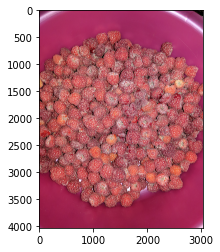

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(250,250))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving raspberry.jpg to raspberry.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Giá trị dự đoán:  Strawberry Wedge


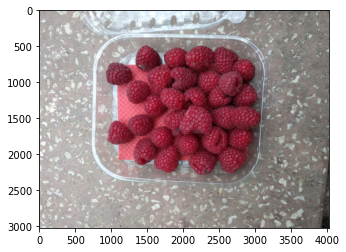

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(250,250))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])